In [22]:
#Importing CSV file of PM2.5

import pandas as pd
csv_pm25 = '../data/Dhaka_PM2.5_2020_YTD.csv'
df = pd.read_csv(csv_pm25)
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Dhaka,PM2.5 - Principal,2020-01-01 01:00 AM,2020,1,1,1,279.0,329,Hazardous,311.0,UG/M3,1 Hr,Valid
1,Dhaka,PM2.5 - Principal,2020-01-01 02:00 AM,2020,1,1,2,288.0,338,Hazardous,297.0,UG/M3,1 Hr,Valid
2,Dhaka,PM2.5 - Principal,2020-01-01 03:00 AM,2020,1,1,3,261.5,312,Hazardous,235.0,UG/M3,1 Hr,Valid
3,Dhaka,PM2.5 - Principal,2020-01-01 04:00 AM,2020,1,1,4,240.7,290,Very Unhealthy,220.0,UG/M3,1 Hr,Valid
4,Dhaka,PM2.5 - Principal,2020-01-01 05:00 AM,2020,1,1,5,242.4,292,Very Unhealthy,244.0,UG/M3,1 Hr,Valid


In [23]:
#Formatting the column name.
#There are gaps in the column name that we need to remove
df.columns.tolist()

['Site',
 'Parameter',
 'Date (LT)',
 'Year',
 'Month',
 'Day',
 'Hour',
 'NowCast Conc.',
 'AQI',
 'AQI Category',
 'Raw Conc.',
 'Conc. Unit',
 'Duration',
 'QC Name']

In [24]:
col_names =['Site',
 'Parameter',
 'Date',
 'Year',
 'Month',
 'Day',
 'Hour',
 'NowCast_Conc',
 'AQI',
 'AQI_Category',
 'Raw_Conc',
 'Conc_Unit',
 'Duration',
 'QC_Name']
df.columns = col_names
df.head()

,Site,Parameter,Date,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name
0,Dhaka,PM2.5 - Principal,2020-01-01 01:00 AM,2020,1,1,1,279.0,329,Hazardous,311.0,UG/M3,1 Hr,Valid
1,Dhaka,PM2.5 - Principal,2020-01-01 02:00 AM,2020,1,1,2,288.0,338,Hazardous,297.0,UG/M3,1 Hr,Valid
2,Dhaka,PM2.5 - Principal,2020-01-01 03:00 AM,2020,1,1,3,261.5,312,Hazardous,235.0,UG/M3,1 Hr,Valid
3,Dhaka,PM2.5 - Principal,2020-01-01 04:00 AM,2020,1,1,4,240.7,290,Very Unhealthy,220.0,UG/M3,1 Hr,Valid
4,Dhaka,PM2.5 - Principal,2020-01-01 05:00 AM,2020,1,1,5,242.4,292,Very Unhealthy,244.0,UG/M3,1 Hr,Valid


In [25]:
#Removing the negative values
#There are negative values in the 7th and 8th column that need to be replaced with mean value

df.loc[df['NowCast_Conc']<0, 'NowCast_Conc'] = df['NowCast_Conc'].mean()
df.loc[df['AQI']<0, 'AQI'] = df['AQI'].mean()

#The negative values have been changed.
#We can check it by following
df['AQI'].loc[5589]
df['NowCast_Conc'].loc[4403]

77.99538106235566

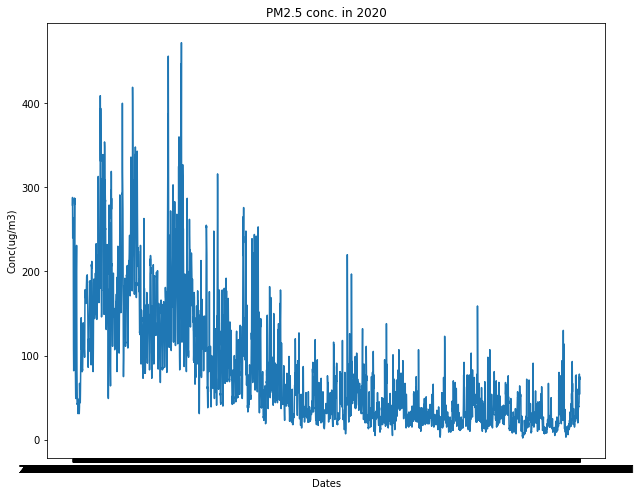

In [26]:
#Visualizing PM2.5 data over the year 

import matplotlib.pyplot as plt
dates = df['Date']
NowCast_Conc = df['NowCast_Conc']
NowCast_Conc = [int(i) for i in NowCast_Conc]
plt.figure(figsize=(10,8))
plt.plot(dates,NowCast_Conc)
plt.title('PM2.5 conc. in 2020')
plt.xlabel('Dates')
plt.ylabel('Conc(ug/m3)')
plt.show()

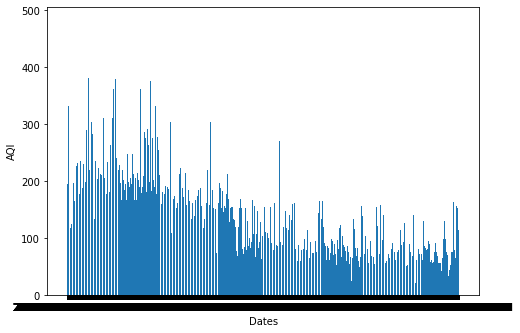

In [27]:
#Visualizing Air Quality Index data over the years(Bar Plot)
import pandas as pd
import matplotlib.pyplot as plt
dates = df['Date']
AQI = df['AQI']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dates,AQI)
plt.xlabel('Dates')
plt.ylabel('AQI')
plt.show()

In [28]:
#For clear visualization, we will consider only few values over the years
df_AQI = df['AQI'].loc[0:6000:742]
lkdn = df['Date'].loc[0:6000:742]
df_AQI
lkdn

0       2020-01-01 01:00 AM
742     2020-01-31 11:00 PM
1484    2020-03-02 10:00 PM
2226    2020-04-02 11:00 PM
2968    2020-05-03 09:00 PM
3710    2020-06-11 07:00 PM
4452    2020-07-13 04:00 PM
5194    2020-08-13 02:00 PM
Name: Date, dtype: object

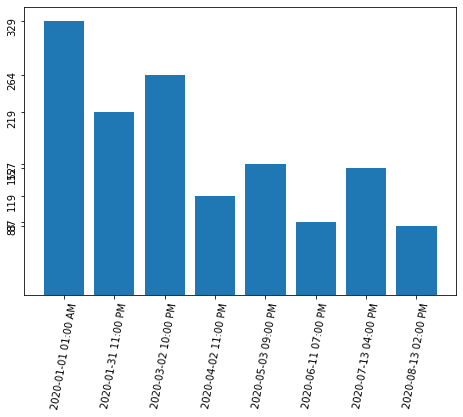

In [29]:
#Bar plot for AQI
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(lkdn,df_AQI)
plt.xticks(lkdn)
plt.yticks(df_AQI)
plt.xticks(rotation=80)
plt.yticks(rotation=90)
plt.show()

In [30]:
#Visualizing pm2.5 over the years
df_pm25 =df['NowCast_Conc'].loc[0:6000:742]
lkdn = df['Date'].loc[0:6000:742]
lkdn
df_pm25

0       279.0
742     168.5
1484    214.0
2226     42.9
2968     68.0
3710     29.1
4452     58.2
5194     27.3
Name: NowCast_Conc, dtype: float64

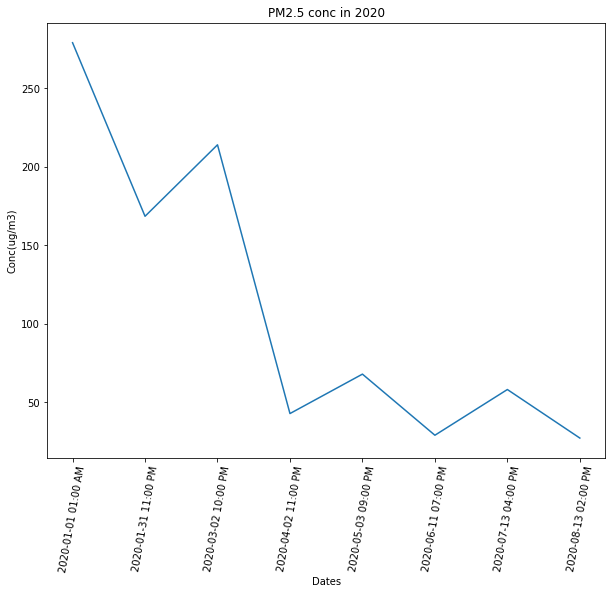

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(lkdn,df_pm25)
plt.title('PM2.5 conc in 2020')
plt.xlabel('Dates')
plt.ylabel('Conc(ug/m3)')
plt.xticks(rotation=80)
plt.show()

In [32]:
#Now we will consider only lockdown period
#Lockdown was imposed on 2020-03-25
df['Date'] = pd.to_datetime(df.Date)
df_lockdown = df.loc[df['Date']>'2020-03-25']
df_lockdown

,Site,Parameter,Date,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name
2012,Dhaka,PM2.5 - Principal,2020-03-25 01:00:00,2020,3,25,1,201.1,251.0,Very Unhealthy,222.0,UG/M3,1 Hr,Valid
2013,Dhaka,PM2.5 - Principal,2020-03-25 02:00:00,2020,3,25,2,222.6,272.0,Very Unhealthy,244.0,UG/M3,1 Hr,Valid
2014,Dhaka,PM2.5 - Principal,2020-03-25 03:00:00,2020,3,25,3,186.8,237.0,Very Unhealthy,151.0,UG/M3,1 Hr,Valid
2015,Dhaka,PM2.5 - Principal,2020-03-25 04:00:00,2020,3,25,4,179.4,230.0,Very Unhealthy,172.0,UG/M3,1 Hr,Valid
2016,Dhaka,PM2.5 - Principal,2020-03-25 05:00:00,2020,3,25,5,160.7,211.0,Very Unhealthy,142.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,Dhaka,PM2.5 - Principal,2020-08-31 20:00:00,2020,8,31,20,78.9,163.0,Unhealthy,83.0,UG/M3,1 Hr,Valid
5625,Dhaka,PM2.5 - Principal,2020-08-31 21:00:00,2020,8,31,21,70.9,159.0,Unhealthy,63.0,UG/M3,1 Hr,Valid
5626,Dhaka,PM2.5 - Principal,2020-08-31 22:00:00,2020,8,31,22,54.4,148.0,Unhealthy for Sensitive Groups,38.0,UG/M3,1 Hr,Valid
5627,Dhaka,PM2.5 - Principal,2020-08-31 23:00:00,2020,8,31,23,75.7,161.0,Unhealthy,97.0,UG/M3,1 Hr,Valid


In [33]:
#Extracting dates before lockdown
df_free = (df['Date'] >= '2020-01-01') & (df['Date']  < '2020-03-25')
df_before = df.loc[df_free]
df_before

,Site,Parameter,Date,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name
0,Dhaka,PM2.5 - Principal,2020-01-01 01:00:00,2020,1,1,1,279.0,329.0,Hazardous,311.0,UG/M3,1 Hr,Valid
1,Dhaka,PM2.5 - Principal,2020-01-01 02:00:00,2020,1,1,2,288.0,338.0,Hazardous,297.0,UG/M3,1 Hr,Valid
2,Dhaka,PM2.5 - Principal,2020-01-01 03:00:00,2020,1,1,3,261.5,312.0,Hazardous,235.0,UG/M3,1 Hr,Valid
3,Dhaka,PM2.5 - Principal,2020-01-01 04:00:00,2020,1,1,4,240.7,290.0,Very Unhealthy,220.0,UG/M3,1 Hr,Valid
4,Dhaka,PM2.5 - Principal,2020-01-01 05:00:00,2020,1,1,5,242.4,292.0,Very Unhealthy,244.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,Dhaka,PM2.5 - Principal,2020-03-24 19:00:00,2020,3,24,19,85.8,167.0,Unhealthy,93.0,UG/M3,1 Hr,Valid
2007,Dhaka,PM2.5 - Principal,2020-03-24 20:00:00,2020,3,24,20,105.5,177.0,Unhealthy,126.0,UG/M3,1 Hr,Valid
2008,Dhaka,PM2.5 - Principal,2020-03-24 21:00:00,2020,3,24,21,105.2,177.0,Unhealthy,105.0,UG/M3,1 Hr,Valid
2009,Dhaka,PM2.5 - Principal,2020-03-24 22:00:00,2020,3,24,22,108.0,178.0,Unhealthy,111.0,UG/M3,1 Hr,Valid


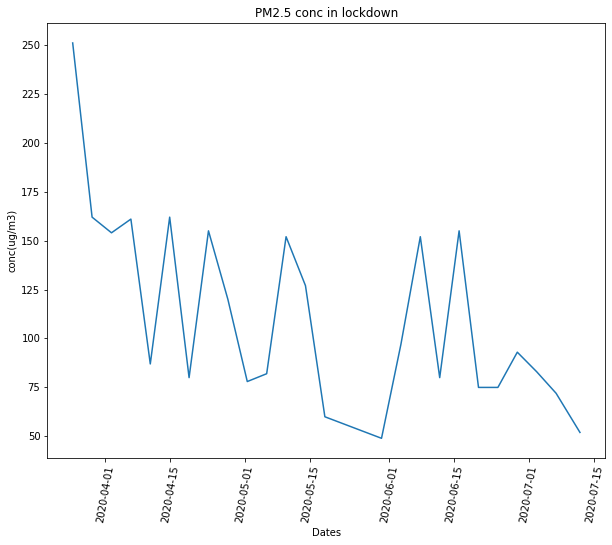

In [34]:
#Visualizing pm2.5 conc in lockdown
import matplotlib.pyplot as plt
dates = df_lockdown['Date'].loc[2000:4500:100]
pm25_lock = df_lockdown['AQI'].loc[2000:4500:100]
pm25_lock = [int(i) for i in pm25_lock]
plt.figure(figsize=(10,8))
length = len(dates)
plt.plot(dates,pm25_lock)
plt.xticks(rotation=80)
plt.title('PM2.5 conc in lockdown')
plt.xlabel('Dates')
plt.ylabel('conc(ug/m3)')
plt.show()

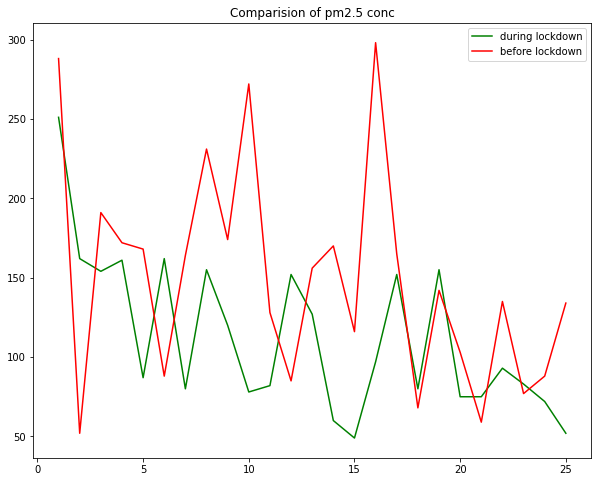

In [35]:
#Comparing pm2.5 conc in lockdown with that before lockdown
#import matplotlib.pyplot as plt
dates = df_before['Date'].loc[1:2000:80]
pm25_before = df_before['NowCast_Conc'].loc[1:2000:80]
pm25_before = [int(i) for i in pm25_before]
plt.figure(figsize=(10,8))
length = [i for i in range(1,len(dates)+1)]
plt.plot(length,pm25_lock,color='green',label='during lockdown')
plt.plot(length,pm25_before,color='red',label='before lockdown')
plt.legend()
plt.title('Comparision of pm2.5 conc')
plt.show()